## Plot ROC curves

This notebook plots ROC curves for relative likelihood neutrality test (rho) and Tajima's D. It processes simulated data produced by simulate_roc_data.py and uses the sklearn roc_curve function.

In [1]:
import numpy as np
import pandas as pd
import gzip, pickle
import os
import sys
import datetime
from sklearn.metrics import roc_curve
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


path = "/Users/helmutsimon/Google Drive/Genetics/Software/msms/lib/data4" 
if not os.getcwd() == path:
    os.chdir(path)

Plot a grid of ROC curves with sample size vesus demography etc., as used in "Neutrality Test" manuscript. 

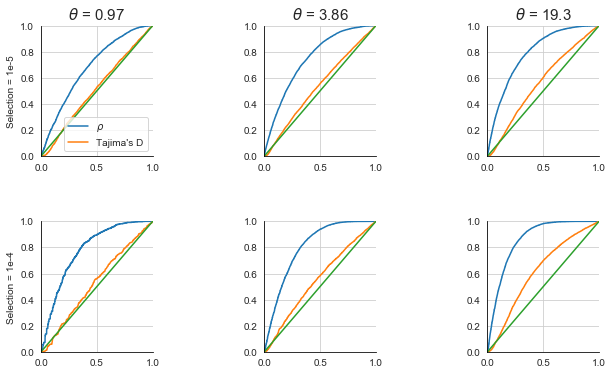

In [14]:
figure = '3b'           #Set for figure to be plotted

if figure == '1':
    subject = 'demographies'
    jobs = [['4d00', '4d01', '4d02', '4d03'], ['4d10', '4d11', '4d12', '4d13'], ['4d20', '4d21', '4d22', '4d23'],
            ['4d30', '4d31', '4d32', '4d33'], ['4d40', '4d41', '4d42', '4d43'], ['4d50', '4d51', '4d52', '4d53']]
    xheads = ['n=10', 'n=20', 'n=100', 'n=1000']
    yheads = ['Growth 1e-4', 'Growth 1e-5', 'Bottleneck 1',  'Bottleneck 2', 'Bottleneck 3', 'Bottleneck 4']
    figsize=(10,10)
    
if figure == '2':
    subject = 'selection'
    jobs = [['4s00', '4s01', '4s02', '4s03'], ['4s10', '4s11', '4s12', '4s13'], ['4s20', '4s21', '4s22', '4s23'],
            ['4s30', '4s31', '4s32', '4s33']]
    xheads = ['n=10', 'n=20', 'n=100', 'n=1000']
    yheads = ['s = .00001', 's = .0001', 's = .001', 's = .005']
    figsize=(10,10)
    
if figure == '3a':
    subject = 'Varying $S_n$'
    jobs = [['4t10', '4t11', '4t12'], ['4t00', '4t01', '4t02'], ['4t20', '4t21', '4t22']]
    xheads = [r'$S_n$ = 5', r'$S_n$ = 20', r'$S_n$ = 100'][:len(jobs[0])]
    yheads = ['growth = 1e-4', 'Bottleneck 1', 'Bottleneck 4']
    figsize=(10, 9)
    
if figure == '3b':
    subject = 'Varying $\theta$'
    jobs = [['4t30', '4t31', '4t32'], ['4t40', '4t41', '4t42']]
    xheads = [r'$\theta$ = 0.97', r'$\theta$ = 3.86', r'$\theta$ = 19.3'][:len(jobs[0])]
    yheads = ['Selection = 1e-5', 'Selection = 1e-4']
    figsize=(10, 6)
    
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", 3)
outpath = "/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/figures/"
fname = outpath + 'ntfig' + figure + '.pdf'
with PdfPages(fname) as pdf:
    fig, axes = plt.subplots(nrows=len(jobs), ncols=len(jobs[0]), figsize=figsize)
    fig.subplots_adjust(wspace=1, hspace=0.5)

    scores = np.linspace(0, 100, 10000)
    for i in range(len(jobs)):
        for j in range(len(jobs[0])):
            job = jobs[i][j]
            
            filename = 'roc_data_' + job + '.pklz'
            with gzip.open(filename, 'rb') as results:
                results = pickle.load(results)
                
            y_rho_f = np.array(results['rho_false'])
            y_rho_f = y_rho_f[np.isfinite(y_rho_f)]
            y_rho_t = np.array(results['rho_true'])
            y_rho_t = y_rho_t[np.isfinite(y_rho_t)]
            y_score_r = np.append(y_rho_f, y_rho_t)
            y_true_r  = np.append(np.zeros(len(y_rho_f)), np.ones(len(y_rho_t)))
            fpr, tpr, thresholds = roc_curve(y_true_r, y_score_r)
            axes[i, j].plot(fpr, tpr, label="$\\rho$")

            y_score_t = np.append(np.absolute(results['taj_false']), np.absolute(results['taj_true']))
            y_true_t  = np.append(np.zeros(len(results['taj_false'])), np.ones(len(results['taj_true'])))
            fpr, tpr, thresholds = roc_curve(y_true_t, y_score_t)
            axes[i, j].plot(fpr, tpr, label="Tajima's D")
            
            axes[i, j].plot([0, 1], [0, 1])
            axes[i, j].spines['right'].set_visible(False)
            axes[i, j].spines['top'].set_visible(False)
            axes[i, j].spines['left'].set_color('black')
            axes[i, j].spines['bottom'].set_color('black')
            axes[i, j].set_xlim(0, 1)
            axes[i, j].set_ylim(0, 1)
           
    axes[0, 0].legend()
    for i, xhead in enumerate(xheads):
        axes[0, i].set_title(xhead, fontsize=15)
    for i, yhead in enumerate(yheads):
        axes[i, 0].set_ylabel(yhead, fontsize=10)
    d = pdf.infodict()
    d['Title'] = 'ROC curve plot for Neutrality Test'
    d['Author'] = 'H. Simon'
    d['Subject'] = 'Fig. ' + figure + ': ' + subject
    d['Keywords'] = 'Job no. (last): ' + str(job)
    d['CreationDate'] = datetime.datetime.today()
    pdf.savefig(fig) 
plt.show()

Do a set of scatterplots for manuscript. Applies to 'figure=1' only. Cell uses jobs and yheads as selected above.


 n=10 Growth 1e-4
Rho:  0.033 0.273
Taj D:  0.011 0.000

 n=10 Growth 1e-5
Rho:  0.035 0.077
Taj D:  0.011 0.001

 n=10 Bottleneck 1
Rho:  0.034 0.037
Taj D:  0.011 0.016

 n=10 Bottleneck 2
Rho:  0.031 0.224
Taj D:  0.012 0.000

 n=10 Bottleneck 3
Rho:  0.034 0.059
Taj D:  0.010 0.036

 n=10 Bottleneck 4
Rho:  0.033 0.039
Taj D:  0.011 0.103

 n=20 Growth 1e-4
Rho:  0.030 0.342
Taj D:  0.023 0.048

 n=20 Growth 1e-5
Rho:  0.028 0.075
Taj D:  0.024 0.007

 n=20 Bottleneck 1
Rho:  0.027 0.044
Taj D:  0.025 0.034

 n=20 Bottleneck 2
Rho:  0.025 0.312
Taj D:  0.024 0.063

 n=20 Bottleneck 3
Rho:  0.028 0.052
Taj D:  0.023 0.083

 n=20 Bottleneck 4
Rho:  0.027 0.026
Taj D:  0.023 0.192

 n=100 Growth 1e-4
Rho:  0.026 0.498
Taj D:  0.024 0.095

 n=100 Growth 1e-5
Rho:  0.025 0.092
Taj D:  0.027 0.007

 n=100 Bottleneck 1
Rho:  0.025 0.112
Taj D:  0.027 0.034

 n=100 Bottleneck 2
Rho:  0.026 0.532
Taj D:  0.028 0.134

 n=100 Bottleneck 3
Rho:  0.023 0.092
Taj D:  0.028 0.078

 n=100 Bottlen

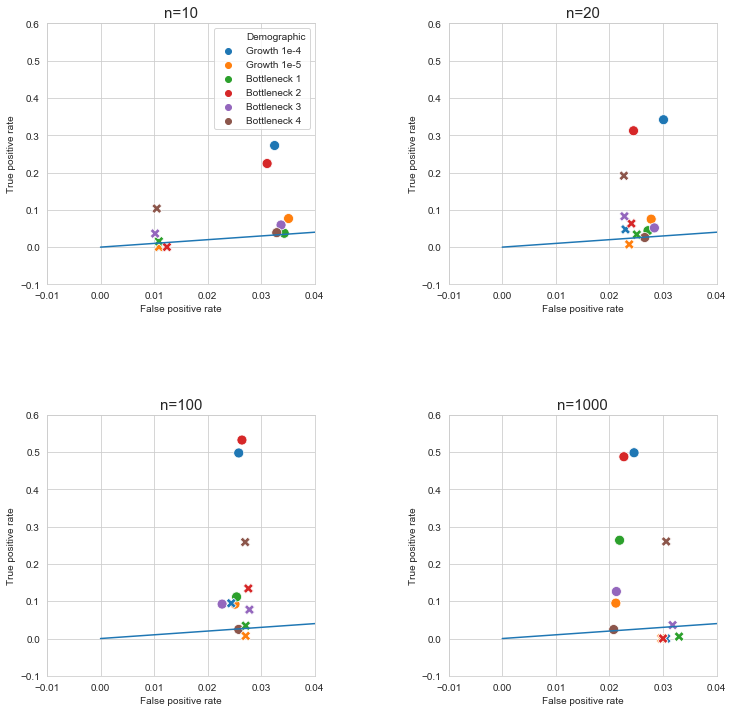

In [6]:
assert figure == '1', 'Only run for figure=1.' 
hues = {'1':'Demographic', '2':'Selection strength', '3a':'Model', '3b':'Model'}
hue = hues[figure]
fname = outpath + 'ntfigc' + figure + 's.pdf'
with PdfPages(fname) as pdf:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.rcParams["axes.labelsize"] = 20
    thresholds = [ 0.69, 0.91, 0.89, -0.08]     #Note these are not logarithms
    markers = ['o', 'x'] 
    titles = ['n=10', 'n=20', 'n=100', 'n=1000']
    for i in range(len(jobs[0])):
        row, col = divmod(i, 2)
        rho_fps, rho_tps, tajD_fps, tajD_tps = list(), list(), list(), list()
        for j in range(len(jobs)):
            job = jobs[j][i]
            filename = 'roc_data_' + job + '.pklz'
            with gzip.open(filename, 'rb') as results:
                results = pickle.load(results)

            tajD_tp = np.sum(np.abs(results['taj_true']) > 2) / len(results['taj_true'])
            tajD_tps.append(tajD_tp)
            tajD_fp = np.sum(np.abs(results['taj_false']) > 2) / len(results['taj_false'])
            tajD_fps.append(tajD_fp)
            
            y_rho_f = np.array(results['rho_false'])
            y_rho_f = y_rho_f[np.isfinite(y_rho_f)]
            y_rho_t = np.array(results['rho_true'])
            y_rho_t = y_rho_t[np.isfinite(y_rho_t)]
            
            rho_tp = np.sum(y_rho_t > thresholds[i]) / len(y_rho_t)
            rho_fp = np.sum(y_rho_f > thresholds[i]) / len(y_rho_f)
            rho_tps.append(rho_tp)
            rho_fps.append(rho_fp)
            print( '\n', titles[i], yheads[j])
            print('Rho: ', "%.3f" % rho_fp, "%.3f" % rho_tp)
            print('Taj D: ', "%.3f" % tajD_fp, "%.3f" % tajD_tp)
        data = {'False positive':rho_fps, 'True positive':rho_tps, hue:yheads}
        data_b = pd.DataFrame(data)
        sns.scatterplot(x='False positive', y='True positive', hue=hue, marker='o',\
                        ax=axes[row, col], data=data_b, s=100, legend=False)
        data = {'False positive':tajD_fps, 'True positive':tajD_tps, hue:yheads}
        data_t = pd.DataFrame(data)
        
        sns.scatterplot(x='False positive', y='True positive', hue=hue, marker='X',\
                        ax=axes[row, col], data=data_t, s=100,  legend='full')
        axes[row, col].set_title(titles[i], fontsize=15)
        axes[row, col].set_xlim([-.01, 0.04])
        axes[row, col].set_ylim([-.1, 0.6])
        axes[row, col].set_xlabel('False positive rate', fontsize=10)
        axes[row, col].set_ylabel('True positive rate', fontsize=10)
        axes[row, col].plot([0, 1], [0, 1])
        if row == 0 and col == 0:
            pass
        else:
            axes[row, col].get_legend().remove()
    d = pdf.infodict()
    d['Title'] = 'Scatter curve plot for neutrality test with thresholds'
    d['Author'] = 'H. Simon'
    d['Subject'] = 'Fig. ' + figure + 's: ' + subject
    d['Keywords'] = 'Job no. (last): ' + str(job)
    d['CreationDate'] = datetime.datetime.today()
    pdf.savefig(fig) 
plt.show()
